In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data.csv')
data.head(5)

,x,y
0,12,78
1,15,89
2,14,99
3,36,98
4,35,95


In [22]:
x = data.iloc[:,0]
y = data.iloc[:,1]

In [23]:
x.head(5)

0    12
1    15
2    14
3    36
4    35
Name: x, dtype: int64

In [24]:
y.head(5)

0    78
1    89
2    99
3    98
4    95
Name: y, dtype: int64

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model1 = LinearRegression()

In [27]:
model1.fit(x[:,np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# fitting polynomial regression to this data

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(degree=4)

By FIT the imputer calculates the means of columns from some data, and by Transform it applies those means to some data (which is just replacing missing values with the means). If both these data are the same (i.e. the data for calculating the means and the data that means are applied to) you can use FIT-TRANSFORM which is basically a fit followed by a transform.

In [33]:
x_poly = poly.fit_transform(x[:,np.newaxis])

In [34]:
poly.fit(x_poly,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [35]:
lin2 = LinearRegression()

In [36]:
lin2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
#Lets visualise the linear regression results

In [38]:
import matplotlib.pyplot as plt

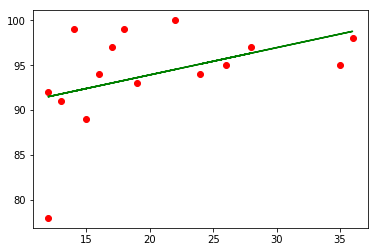

In [42]:
plt.scatter(x,y,color = 'r')
plt.plot(x,model1.predict(x[:,np.newaxis]),color = 'g')

In [43]:
#Visualize using the polynomial features

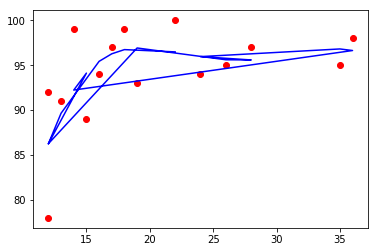

In [47]:
plt.scatter(x,y,color = 'r')
plt.plot(x,lin2.predict(poly.fit_transform(x[:,np.newaxis])),color = 'b')

In [50]:
test_input = np.array([100])
test_input = test_input[:,np.newaxis]
model1.predict(test_input)

array([118.18512244])

In [51]:
lin2.predict(poly.fit_transform(test_input))

array([-10501.19886676])

In [55]:
data2 = pd.read_csv('test_data.csv')
data2.head(5)

,State,Age,Salary,Donated_PMCare
0,JK,35.0,72000.0,yes
1,HP,22.0,65000.0,yes
2,MP,24.0,78000.0,no
3,JK,25.0,50000.0,no
4,JK,27.0,38000.0,no


In [58]:
data2

,State,Age,Salary,Donated_PMCare
0,JK,35.0,72000.0,yes
1,HP,22.0,65000.0,yes
2,MP,24.0,78000.0,no
3,JK,25.0,50000.0,no
4,JK,27.0,38000.0,no
5,HP,38.0,48000.0,no
6,MP,23.0,70000.0,yes
7,MP,31.0,NaN,yes
8,HP,29.0,62000.0,yes
9,MP,28.0,68000.0,no


Data filling at the nan positions

1. using fillna() method

In [57]:
data2.isnull().sum()

State             0
Age               1
Salary            2
Donated_PMCare    1
dtype: int64

In [69]:
print(data2['Age'].fillna(data2['Age'].mean()).isnull().sum())
#df['MashThickness'].fillna(df['MashThickness'].mean()).isnull().sum()

0


In [70]:
data2['Salary'].fillna(data2['Salary'].mean()).isnull().sum()

0

In [71]:
data2['Donated_PMCare'].fillna('yes').isnull().sum()

0

2. Using imputer method

In [72]:
x_ = data2.iloc[:,:-1].values
y_ = data2.iloc[:,3].values

In [74]:
from sklearn.impute import SimpleImputer

In [76]:
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')

In [77]:
imputer = imputer.fit(x_[:,1:3])

In [79]:
x_[:,1:3] = imputer.transform(x_[:,1:3])

In [80]:
x_

array([['JK', 35.0, 72000.0],
       ['HP', 22.0, 65000.0],
       ['MP', 24.0, 78000.0],
       ['JK', 25.0, 50000.0],
       ['JK', 27.0, 38000.0],
       ['HP', 38.0, 48000.0],
       ['MP', 23.0, 70000.0],
       ['MP', 31.0, 61222.22222222222],
       ['HP', 29.0, 62000.0],
       ['MP', 28.0, 68000.0],
       ['JK', 28.2, 61222.22222222222]], dtype=object)

In [81]:
#Lets encode the categorical values

In [82]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [83]:
labelencoder = LabelEncoder()

In [85]:
x_[:,0] = labelencoder.fit_transform(x_[:,0])

In [87]:
onehotencoder = OneHotEncoder(handle_unknown ='ignore')

In [89]:
x_encod = onehotencoder.fit_transform(x_[:,0:1]).toarray()

In [90]:
labelencoder_y = LabelEncoder()

In [91]:
y = labelencoder_y.fit_transform(y)

In [92]:
print(x_encod)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [93]:
y

array([ 0,  1,  9,  8,  6,  5,  7,  6,  4,  3,  2,  5,  7,  9, 10],
      dtype=int64)